In [1]:
import pandas as pd 
import pandas as pd 
df = pd.read_excel("/Users/user/Documents/projects/PROJECT AIR/PM-Data-CAMS_mod_final3.xlsx")

df


,Date,PM2.5(Sangsad),PM10(Sangsad),PM2.5(BARC),PM10(BARC),PM2.5(Darussalam),PM10(Darussalam),(Gazipur),PM10(Gazipur),PM2.5(Narayonganj),PM10(Narayonganj),temperature(max),Humidity(avg),WIND,Rainfall,Temp(avg),Wind Direction
0,2012-11-01 00:00:00,NaN,NaN,24.241000,76.525556,69.717917,106.649583,95.256667,129.143750,91.745652,154.165652,32.3,67,2.0,Nan,27.6,NNW
1,2012-11-02 00:00:00,NaN,NaN,24.988333,70.533333,60.167083,96.252500,103.199565,143.230833,83.719583,150.599167,31.4,61,3.0,Nan,27.6,W
2,2012-11-03 00:00:00,NaN,NaN,16.891250,61.430417,55.534167,84.261667,61.941667,79.681250,62.883913,102.994167,27.6,71,2.0,Nan,24.8,NW
3,2012-11-04 00:00:00,NaN,NaN,20.068571,44.407727,50.337083,61.645217,54.100000,62.429545,39.520000,63.414118,23.8,92,0.0,Nan,22.5,CLM
4,2012-11-05 00:00:00,25.297273,42.646364,13.299444,40.392857,41.287895,40.866842,33.537619,34.394000,38.890588,43.620588,25.1,91,2.0,Nan,23.5,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,2017-12-27 00:00:00,NaN,NaN,154.468182,187.654286,173.075417,259.599583,173.456667,252.959167,202.468750,300.111429,27.1,72,4.0,3,21.1,NE
1883,2017-12-28 00:00:00,NaN,NaN,146.288750,161.967500,164.189474,222.887917,146.285417,198.246667,290.141667,391.669048,24.6,85,2.0,17,19.4,NW
1884,2017-12-29 00:00:00,NaN,NaN,149.268750,178.242917,NaN,321.000000,131.814583,206.797917,230.569500,341.337778,27.0,83,0.0,Nan,19.7,CLM
1885,2017-12-30 00:00:00,NaN,NaN,131.607917,156.198333,NaN,NaN,NaN,NaN,NaN,NaN,29.1,67,0.0,Nan,21.6,CLM


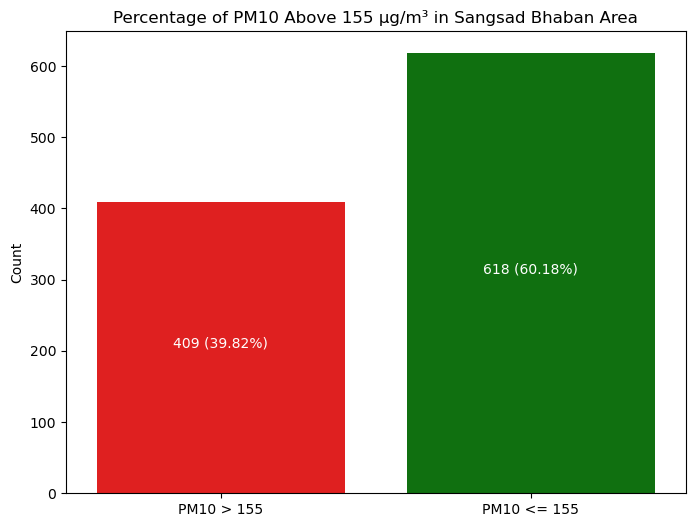

Percentage of PM10 above 155 μg/m³: 39.82%


In [4]:
df4 = df.dropna(subset=['PM10(Sangsad)'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
above_355 = df4[df4['PM10(Sangsad)'] > 155].shape[0]

total_count = df4['PM10(Sangsad)'].count()

percentage_above_35_5 = (above_355 / total_count) * 100

bar_labels = ['PM10 > 155', 'PM10 <= 155']

bar_heights = [above_355, total_count - above_355]

plt.figure(figsize=(8, 6))
sns.barplot(x=bar_labels, y=bar_heights, palette=['red', 'green'])

for i in range(len(bar_labels)):
    plt.text(i, bar_heights[i] / 2, f'{bar_heights[i]} ({bar_heights[i] / total_count * 100:.2f}%)', ha='center', color='white')

plt.title('Percentage of PM10 Above 155 μg/m³ in Sangsad Bhaban Area')
plt.ylabel('Count')
plt.show()

print(f"Percentage of PM10 above 155 μg/m³: {percentage_above_35_5:.2f}%")

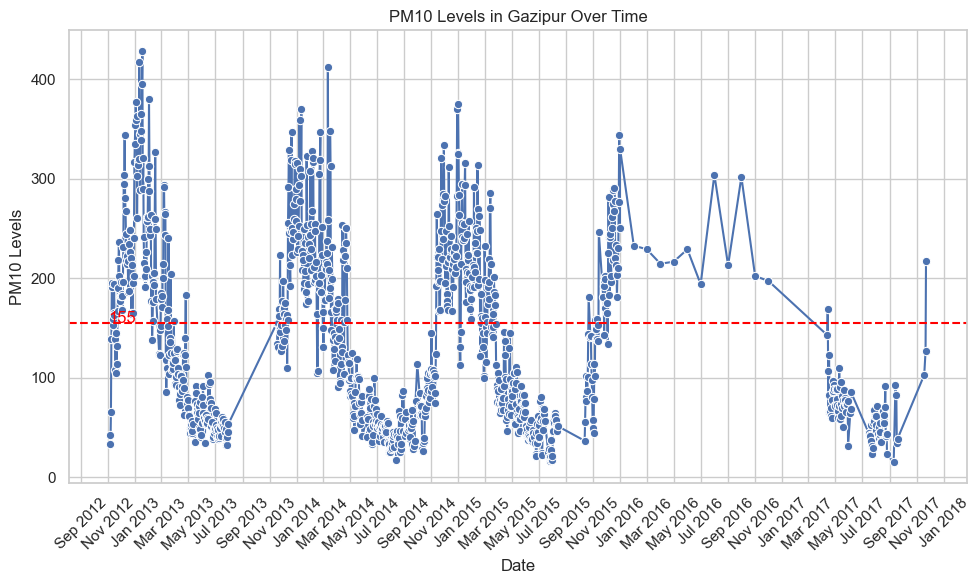

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming your dataset is named 'df' and contains columns 'Date' and '(Gazipur)'
# Make sure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set seaborn style
sns.set(style="whitegrid")

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='PM10(Sangsad)', marker='o')
plt.xlabel('Date')
plt.ylabel('PM10 Levels')
plt.title('PM10 Levels in Gazipur Over Time')

# Format the x-axis labels using DateFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the x-axis ticks using MonthLocator with a customized interval
months = mdates.MonthLocator(interval=2)  # Set interval to 2 months
ax.xaxis.set_major_locator(months)

plt.xticks(rotation=45)

# Draw red dashed line at y=35.5
plt.axhline(y=155, color='red', linestyle='--')

# Add label on the left side of y-axis
plt.text(df['Date'].iloc[0], 155, '155', color='red')

plt.tight_layout()

# Display the plot
plt.show()


In [8]:
from pycaret.regression import RegressionExperiment
from pycaret.regression import *

df = df.dropna(subset=['PM10(Sangsad)']) 

s = RegressionExperiment()
s.setup(df, target = 'PM10(Sangsad)',ignore_features=['(Gazipur)','PM2.5(Sangsad)','PM2.5(BARC)','PM10(BARC)','PM2.5(Darussalam)','PM10(Darussalam)','PM2.5(Narayonganj)','PM10(Narayonganj)','temperature(max)',"Date",] ,session_id = 123)


,Description,Value
0,Session id,123
1,Target,PM10(Sangsad)
2,Target type,Regression
3,Original data shape,"(1027, 17)"
4,Transformed data shape,"(1027, 23)"
5,Transformed train set shape,"(718, 23)"
6,Transformed test set shape,"(309, 23)"
7,Ignore features,10
8,Numeric features,4
9,Categorical features,2


In [9]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,24.1648,1228.7043,34.5515,0.8486,0.2542,0.2138,0.0810
gbr,Gradient Boosting Regressor,25.0454,1293.0681,35.4553,0.8404,0.2738,0.2312,0.0370
et,Extra Trees Regressor,25.1599,1326.6252,35.9223,0.8368,0.2641,0.2218,0.0770
lightgbm,Light Gradient Boosting Machine,25.3269,1385.3492,36.8142,0.8288,0.2619,0.2147,0.1060
br,Bayesian Ridge,26.3746,1385.5222,36.8498,0.8288,0.3204,0.2763,0.0200
en,Elastic Net,26.3578,1388.3090,36.8853,0.8284,0.3186,0.2779,0.0200
lasso,Lasso Regression,26.4703,1390.4122,36.9139,0.8282,0.3201,0.2785,0.0470
llar,Lasso Least Angle Regression,26.4704,1390.4174,36.9140,0.8282,0.3201,0.2785,0.0330
xgboost,Extreme Gradient Boosting,25.7925,1406.5730,37.0930,0.8260,0.2744,0.2231,0.0520
ridge,Ridge Regression,26.6418,1423.3441,37.3531,0.8242,0.3276,0.2781,0.0290


In [10]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…